# Decision Trees

In [2]:
from IPython.display import Image

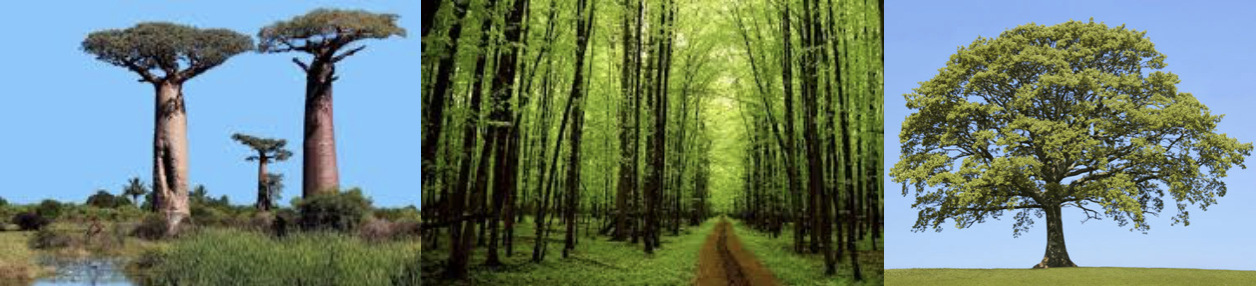

In [3]:
Image(
    filename="images/trees.png",
    width=400,
    height=200,
)

**Decision Tree** is *non-parametric* supervised learning method that is used for solving classification and regression problems.  There are two types of decision trees in data mining: **classification tree** - used to predict the class to which the input data belongs to (the outcome is categorical variable), and **regression tree** - where the outcome that needs to be predicted is the real number (the outcome is continuous variable), for example, the price of a house. The idea behind Decision Trees is to create a model, in form of the tree structure, that predicts the value of the target variable by learning decision rules inferred from the data features.

## A Theoretical Approach

Let's try to answer a question whether a person will play golf by leveraging the data that contains weather conditions as shown in the Figure below.

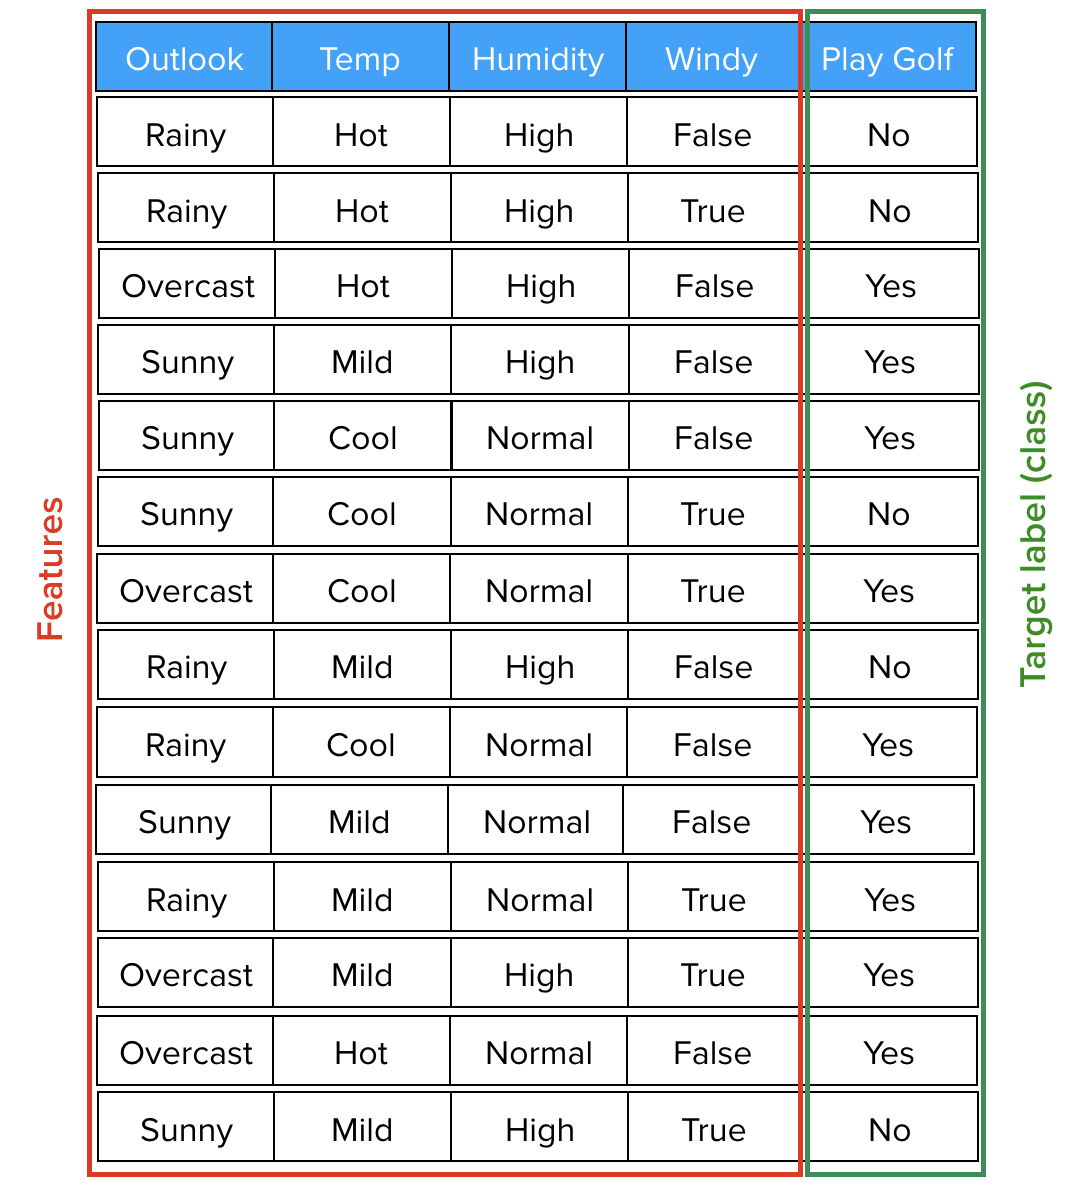

In [4]:
Image(
    filename="images/image_0.png",
    width=350,
    height=350,
)

The first thing that needs to be investigated is what features (attributes) in the dataset are most relevant for answering the aforementioned problem. To do that, we introduce **feature selection measure** - the splitting criterion that "best" separates given data of class-labelled training tuples into individual classes. Ideally that would mean splitting the dataset such that all of the tuples that fall into the given partition after splitting would belong to the same class. Thus, the splitting criteria that closely results to such scenario is called the "best" splitting one.

Three most popular **feature selection measures** are: *Information Gain*, *Gain Ratio* and *Gini Index*, which are going to be introduced later in the text. If using SKLearn, it allows you to manually select split criterion during the classifier implementation. 

## The Structure of Decision Tree

Features represent nodes, and a decisoin tree is built top-down where the top most node in a tree is called a **root node**. Selecting this node depends on the splitting criterion that has been used, for example, the feature with the largest information gain is used for splitting. The **branches** represent the outcome of the splitting, **leaf node** represents the decision, and each internal, decision node of the tree corresponds to a feature. The dataset is divided by its branches, and this procedure is repeated on every non-leaf branch. As can be seen for feature *Outlook*, value *Overcast* belongs to class *Yes* which shows the case when the entropy of some branch is zero (all examples belong to one class).

From the already constructed decision tree, it is possible to obtain *IF-THEN* decision rules. The mapping is performed from the root node until the leaf node is reached, as shown in Figure below.

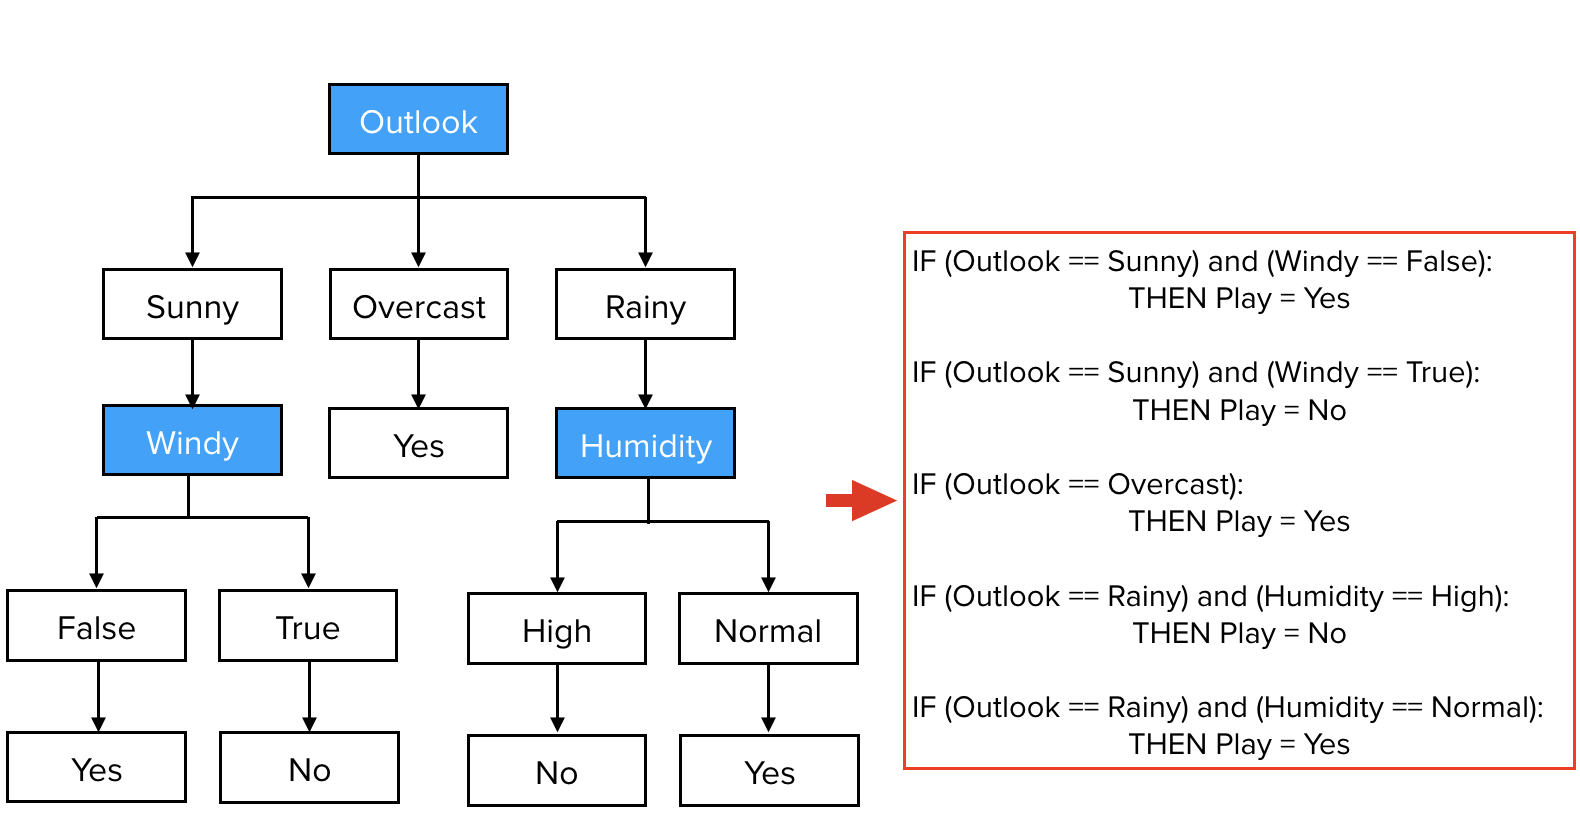

In [5]:
# Easy to visulaise.
Image(
    filename="images/image_1.png",
    width=600,
    height=600,
)

## Feature Selection Measures

#### A. Entropy in Information Theory

Let's try to understand what is entropy through a simple example. Consider tossing a coin with known probabilities of coming up heads $p$ or tails $q$. 

*Case 1:* 

If we assume that the coin is fair, then for the next toss of the coin the entropy is maximized since there is equal probability that it is head and tail $(p = 0.5, q = 0.5)$. This example shows when the entropy is highest since it is very difficult to predict what the next outcome of the toss of the coin is going to be $(H(X)=1)$. Each time the coin is tossed, the result is expressed in one full *bit of information*, where the *bit* is a basic unit of the information. The information, measured in bits, represents the most commonly way of purity measuring. 

*Case 2:* 

Now imagine we don't have a fair coin $(p\neq q)$, but the one for which we can assume that the probability of getting heads is greater than getting tails $(p = 0.7 > q = 0.3)$. We can expect that in this case, when tossing the coin we'll get less uncertainty which can be represented by getting lower entropy $(H(X)=0.8816\ bit)$.

*Case 3:* 

And finally, there is the extreme case when we have a coin that is double-headed which never comes-up with tails (or if it is double tailed, with heads), $p=1, q=0$. In this case, when tossing the coin we can anticipate that entropy will be always zero since there is no uncertainity here (no new information when tossing a coin), $H(X)=0$.

Formally, **entropy** is defined as: 
$$H(X)= -\sum_{i=1}^{n}P(x_{i})\cdot log_{b}P(x_{i})$$

where $X$ is a discrete random variable with possible outcomes $\left \{ x_{1},x_{2},...,x_{n} \right \}$, and $b$ is the base of the algorithm, $b=2$.

#### B. Entropy  in Decision Trees

Observe the dataset S and calculate its entropy as: $$H(S)= -\sum_{x\in X}p(x)\cdot log_{2}p(x)$$
where X is the set of classes in $S$, $p(x)$ is the ratio of the number of elements that belong to the class x and overall number of elements in S. In case H(S)=0 this would mean that all the elements in the classes belong to one same class.

So, for the target label $C=\left \{ Yes, No \right \}$

$$H(PlayGolf)= -\frac{5}{14}\cdot log_{2}\left ( \frac{5}{14} \right )-\frac{9}{14}\cdot log_{2}\left ( \frac{9}{14} \right )$$

$$H(PlayGolf)=-0.36\cdot log_{2}(0.36)-0.64\cdot log_{2}(0.64)=0.94$$

Then, split the dataset S by feature (e.g. Outlook) such that $$S=\bigcup_{t\in T}t$$ where T is newly created subset. 

Calculate entropy for that attribute $$H(S,Attribute)=\sum_{t\in T}p(t)\cdot H(t)$$ Here, p(t) is the ratio of the number of elements in t and the total number of elements in $S$ and H(t) is the entropy of the subset calculated according to the original entropy formula. 

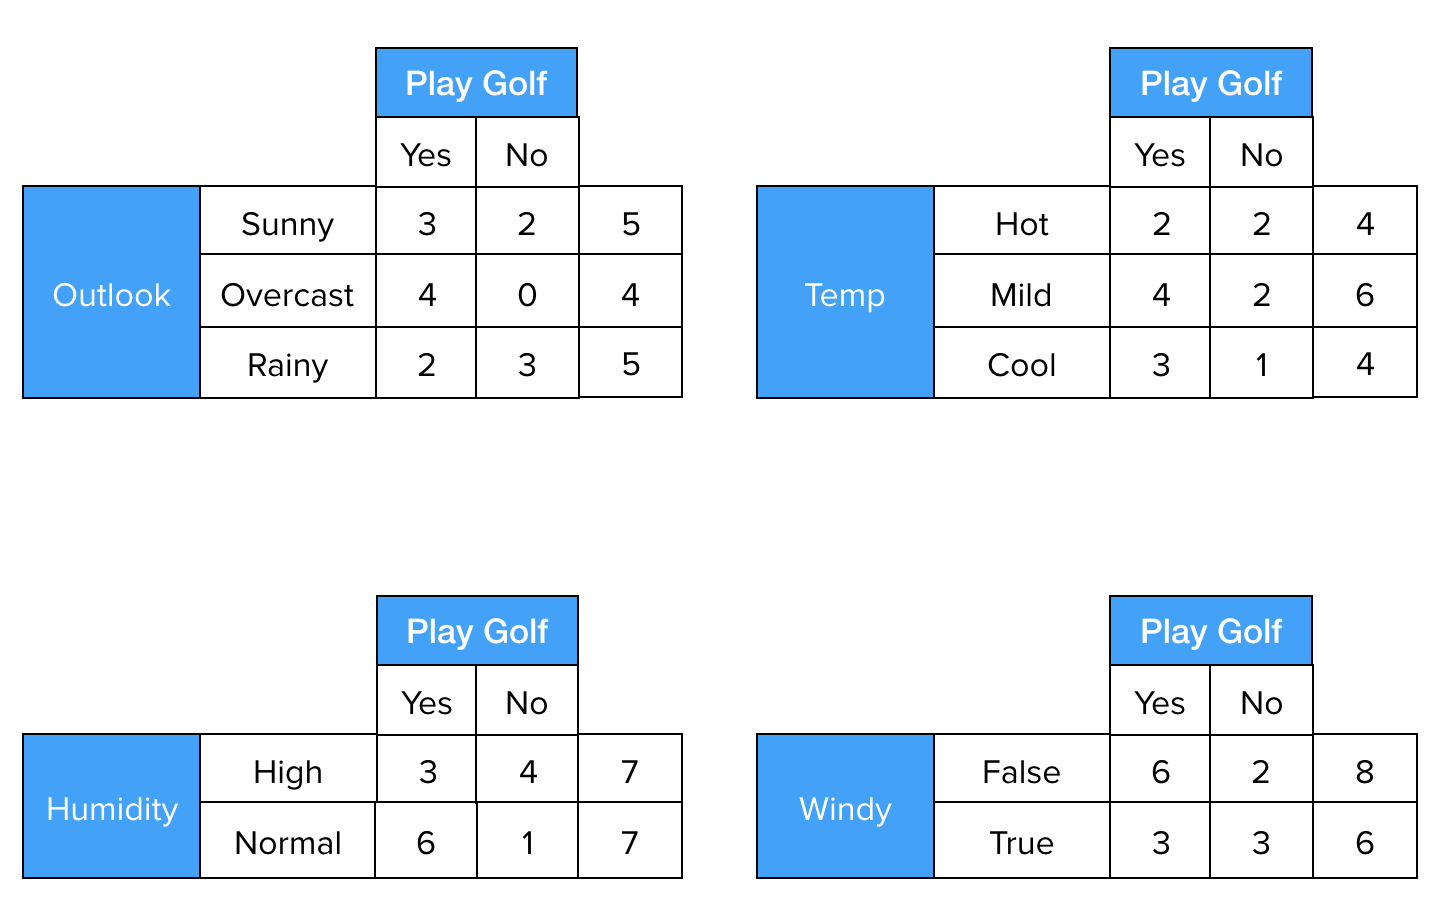

In [6]:
Image(
    filename="images/image_3.png",
    width=550,
    height=300,
)

$H(PlayGolf,Outlook)=\\
p(Sunny)\cdot \Big( -p(Sunny\mid Yes)\cdot log_{2}\big(p(Sunny\mid Yes)\big)-p(Sunny\mid No)\cdot log_{2}\big(p(Sunny\mid No)\big)\Big)+\\
p(Overcast)\cdot \Big(-p(Overcast\mid Yes)\cdot log_{2}\big(p(Overcast\mid Yes)\big)-p(Overcast\mid No)\cdot log_{2}\big(p(Overcast\mid No)\big)\Big)\\+
p(Rainy)\cdot \Big(-p(Rainy\mid Yes)\cdot log_{2}\big(p(Rainy\mid Yes)\big)-p(Rainy\mid No)\cdot log_{2}\big(p(Rainy\mid No)\big) \Big) = 0.693$


For the rest of the features, entropies are:

$$H(PlayGolf,Temp)= 0.911$$
$$H(PlayGolf,Windy)=0.892$$
$$H(PlayGolf,Humidity)= 0.788$$

Use **Information Gain** to decide which feature to split on at each step in building the tree. It measures  how much the uncertainty is reduced when the dataset $S$ is split on the specific attribute (represents the measure of the difference in entropy from before to after the dataset is split on the attribute):

$$InformationGain = H(S)-H(S,Attribute)$$

Thus, when constructing a decision tree, the attribute with the highest inofrmation gain is selected for splitting.
The dataset is divided by its branches, and this procedure is repeated on every non-leaf branch. Let's have a look on information gain values calculated for all attributes from our example:

$$Information Gain(Humidity)=0.152$$

$$Information Gain(Windy)=0.048$$

$$Information Gain(Outlook)=0.247$$

$$Information Gain(Temp)=0.029$$

### What are the steps of Decision Trees?

* Start with all training data at root node and compute the metric of intereset (for example entropy) for dataset.


* For every feature: compute impurity metric for all categorical values (for example, calculate entropy and the information gain for the features).


* Pick the highest gain feature.


* Recursively find best split on subset of data generated at each node.


* Repeat until we get the tree we desired and exit when suitable condition is reached.


### Feature Space

Each object can be represented via its *feature vector* which is n-dimenisonal vector that stores numerical features for that object. For example, if the object is an image, then its *feature vector* are pixels of that image. *Feature vector* is commonly used in machine learning since it facilitates the process of applying statistical analysis. The collection of such vectors compose *vector space* which is usually called *feature space*.


As stated, *feature space* refers to the n-dimensions where features live, exlcuding the target variable, if it is present. So if there are two features $x_{1}$, $x_{2}$ in the dataset, then the feature space will be $R^{2}$. Decision tree learning only allows axis perpendicular splits. Each rectangle is labelled with one of the classes, as shown in Figure below.

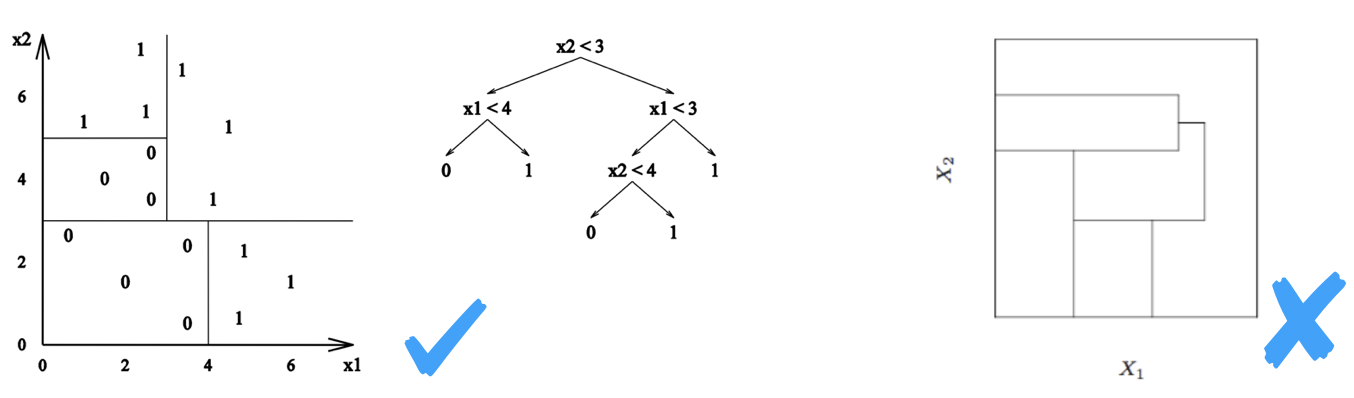

In [7]:
Image(
    filename="images/image_4.png",
    width=700,
    height=550,
)

### Stop Condition - Overfitting

**Overfitting** occurs when the decision tree is so complex that it does not generalise the data well, thus in order to avoid that, the stop criteria needs to be defined. Without stopping condition, algorithm will continue until pure nodes are reached (unless feature space is very limited)  which generally results in overfitting.

One of the stopping criterias are defining **minimum leaf size** (the minimum number of samples that needs to be at a leaf node), and **minimum split size** (the minimum number of samples required to split an internal node). Also, there is a method called **prunning** that uses statistical measures to remove the branches that are the least reliable. There are two types of **prunning**: **prepruning** and **postpruning** approach. The latter approach is much more common and it refers to removing subtrees after the tree is completely constructed. The subtress are prunned by removing their branches and replacing them with the leaf node which represents the most present class of the subtree.

### Data Preparation

* Decision trees deal with mixed (categorical/continuous) data very well. Feature values are preferred to be categorical. If the values are continuous then they are discretised prior to building the model.


* Missing values: let algorithm deal with these if possible. Usually able to deal with “missing” as an attribute.


* Class imbalance: Susceptible to imbalanced classes. Up/down sampling helps get around this.


## Decision Trees Pros and Cons
----

**Pros:**

* They are simple to understand and to interpret as well as to visualise. 


* They require little data preparation, very fast to classify new data and reasonably fast to train.


* Can be useful in data exploration. For example, in case when dataset contains hundreds of features, the decision tree might help in indetifying the most significant features.


**Cons:**

* Only allows axis-perpendicular splits.


* The decision tree is not so robust. The structure of the tree is highly susceptible to small changes in data which means inserting small variations in the input data causes construction of different trees.


* Greedy training process means that the globally optimal solution unlikely to be found. This comes as a consequence of making optimal decisions locally at each node inside the tree.


## Literature

* Han, Jiawei, Jian Pei, and Micheline Kamber. Data mining: concepts and techniques. Elsevier, 2011. (pdf version available online)


* https://en.wikipedia.org/wiki/Entropy_(information_theory)


* https://en.wikipedia.org/wiki/ID3_algorithm


* http://www.saedsayad.com/data_mining_map.htm


* https://www.datacamp.com/community/tutorials/xgboost-in-python


* http://blog.kaggle.com/2017/01/23/a-kaggle-master-explains-gradient-boosting/